In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [ ]:
df1 = pd.read_excel('drive/MyDrive/Fria/data/ML_Sample1.xlsx')
df2 = pd.read_excel('drive/MyDrive/Fria/data/ML_Sample2.xlsx')
df3 = pd.read_excel('drive/MyDrive/Fria/data/ML_Sample3.xlsx')
df4 = pd.read_excel('drive/MyDrive/Fria/data/ML_Sample4.xlsx')
frames = [df1, df2, df3]
df = pd.concat(frames)
print(df)

      Frequency  Particle velocity  Kinetic Energy  Particle diameter
0      0.000134           4.624926    1.406277e+10           100.1500
1      0.000060           4.621465    1.407331e+10           100.2250
2      0.000063           4.618009    1.408384e+10           100.3000
3      0.000084           4.614558    1.409437e+10           100.3750
4      0.000062           4.611113    1.410490e+10           100.4500
...         ...                ...             ...                ...
1995   0.000615           3.805730    8.629973e+11           449.8575
1996   0.000136           3.805328    8.630885e+11           449.9050
1997   0.000511           3.804926    8.631796e+11           449.9525
1998   0.000754           3.804525    8.632707e+11           450.0000
1999   0.000236           3.804525    8.632707e+11           450.0000

[6000 rows x 4 columns]


In [ ]:
X = np.array(df)[:,:3]
y = np.array(df)[:,3]

In [ ]:
np.corrcoef(np.array(df)[:,1],np.array(df)[:,2])

array([[1.        , 0.64821841],
       [0.64821841, 1.        ]])

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.8, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split

train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

#print(x_train, x_val, x_test)

In [ ]:
model = GradientBoostingRegressor()
#model = RandomForestRegressor( max_depth=100)
# evaluate the model
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
model.predict(x_test)

array([370.4857487 , 190.21851295, 429.12540528, ..., 357.08856174,
       354.71392438, 219.20133996])

(array([ 82.,  74., 101.,  85., 106., 144., 139., 162., 140., 167.]),
 array([100.81079705, 135.6659895 , 170.52118196, 205.37637441,
        240.23156687, 275.08675932, 309.94195178, 344.79714423,
        379.65233669, 414.50752914, 449.3627216 ]),
 <a list of 10 Patch objects>)

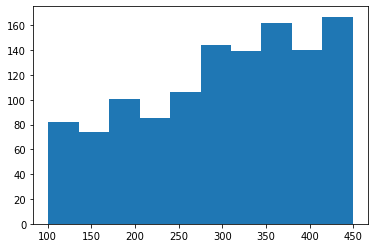

In [ ]:
plt.hist(model.predict(x_test))

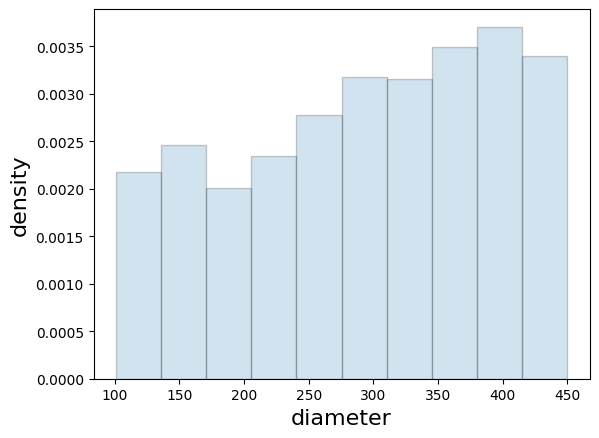

In [ ]:
plt.hist(y_test,density=True,edgecolor = "black",alpha = 0.2)
plt.xlabel('diameter',fontsize = 16)
plt.ylabel('density',fontsize = 16)

plt.savefig('drive/MyDrive/Fria/hist_true.png', format='png', bbox_inches='tight')
#plt.savefig('drive/MyDrive/Fria/hist.png', format='png', bbox_inches='tight')

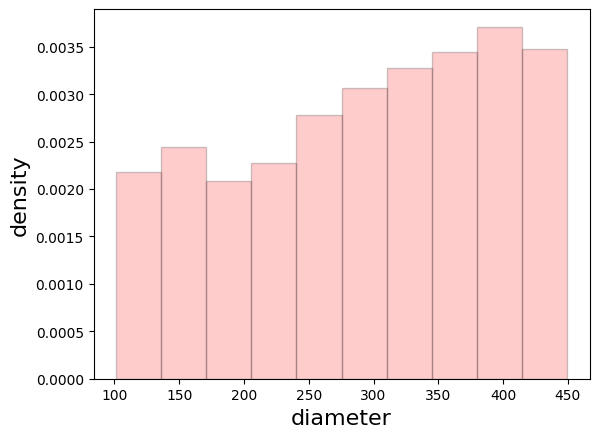

In [ ]:
plt.hist(model.predict(x_test),density=True,color='red',edgecolor = "black",alpha = 0.2)
plt.xlabel('diameter',fontsize = 16)
plt.ylabel('density',fontsize = 16)

plt.savefig('drive/MyDrive/Fria/hist_predict.png', format='png', bbox_inches='tight')
#plt.savefig('drive/MyDrive/Fria/hist.png', format='png', bbox_inches='tight')

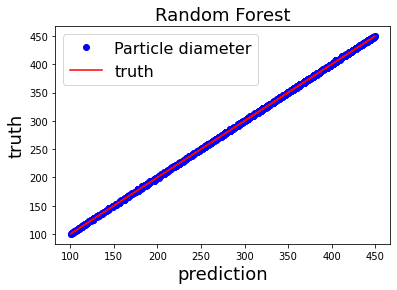

In [ ]:
plt.plot(model.predict(x_test),y_test,'bo',label='Particle diameter')
plt.plot(y_test,y_test,'r',label ='truth')
plt.xlabel('prediction',fontsize = 18)
plt.ylabel('truth',fontsize = 18)
plt.title('Random Forest',fontsize = 18)
plt.legend(fontsize=16)

In [ ]:
print(mean_absolute_percentage_error(model.predict(x_test), y_test))
print(r2_score(model.predict(x_test), y_test))

0.0001696039797551809
0.9999997523908005


In [ ]:
plt.figure()
plt.ylabel('input importance RF',fontsize = 16)
plt.bar(range(3),model.feature_importances_,color='b',align = 'center')
plt.xticks(range(3),['$L top in channel$','$L bottom in channel$','dt, ms'],fontsize = 18,rotation = 90)
#plt.savefig('drive/MyDrive/CA/figures/Chimney_day2_EF_CAE_import.eps', format='eps', bbox_inches='tight')
plt.show()

In [ ]:
model.feature_importances_

array([4.19065014e-07, 1.70780023e-02, 9.82921579e-01])

In [ ]:
from sklearn.inspection import permutation_importance

permutation_importance(clf, X_train, y_train)
#plt.barh(['Frequency',  'Particle velocity',  'Kinetic Energy'], model.feature_importances_)
plt.barh(['Frequency',  'Particle velocity',  'Kinetic Energy'], model.permutation_importance)
plt.xlabel('Feature importance',fontsize = 16)
plt.title('Gradient Boosting',fontsize = 18)
plt.legend(fontsize = 16)

In [ ]:


from PIL import Image
im = Image.open('drive/MyDrive/SW_img/dymv.gif')

# To iterate through the entire gif

for i in range(70):
  im.seek(im.tell()+1)

In [ ]:
result = permutation_importance(model, x_train, y_train)
perm_sorted_idx = result.importances_mean.argsort()

In [ ]:
result.importances.shape

(3, 5)

In [ ]:
result.importances_mean

array([8.41830046e-07, 1.21145541e-02, 2.09700845e+00])

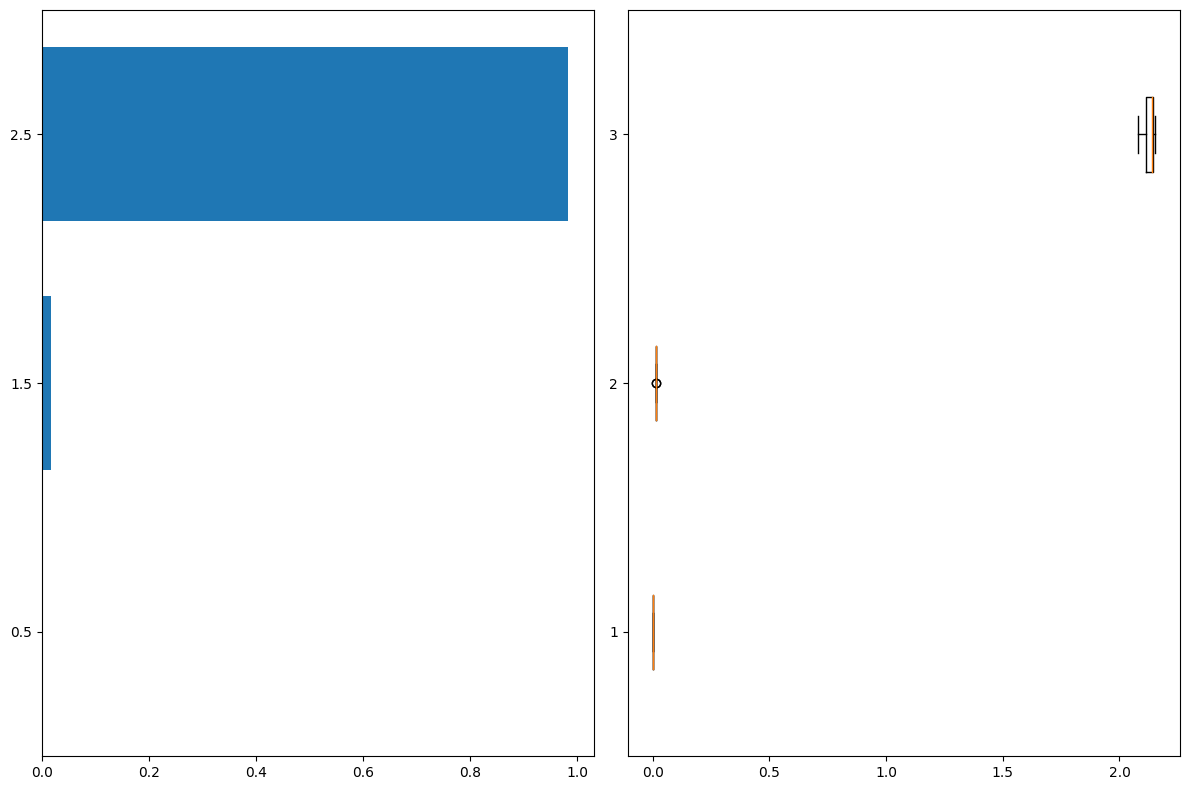

In [ ]:
result = permutation_importance(model, x_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(model.feature_importances_)
tree_indices = np.arange(0, len(model.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, model.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
#ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx])
ax1.set_ylim((0, len(model.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    #labels=data.feature_names[perm_sorted_idx],
)
fig.tight_layout()
plt.show()